In [1]:
from branching_model import Phylogeny

number_of_treatments = 3
phylogeny = Phylogeny.Phylogeny(
    is_cell=False,
    learning_rate=0.01,
    baseline_growth_rate=0.05,
    resistance_cost=0.4,  # multiplied by sum of resistance scores
    resistance_benefit=2,  # multiplied by treatment effect
    mutations_per_division=0.4,
    number_of_treatments=number_of_treatments,
    seed=1,
)

detection_cell_count = 500
n_timesteps_treatment = 300
phylogeny.run_simulation(detection_cell_count, n_timesteps_treatment, max_cycles=6)

growth rates: 0.020027032494544985 ± 0.0
growth rates: 0.02011692821979523 ± 0.0
growth rates: 0.020208153128623965 ± 0.0
growth rates: 0.02048963159322739 ± 0.00018887966871261597
growth rates: 0.02060000151395798 ± 0.00020525306463241476
growth rates: 0.023966418206691747 ± 0.004605129627865964
growth rates: 0.02175806425511837 ± 0.007352659145714727
growth rates: 0.027694376111030577 ± 0.01247725429748234
growth rates: 0.028260199911892412 ± 0.011415464109201754
growth rates: 0.031885447353124624 ± 0.01051986358557311
growth rates: 0.033068609010014266 ± 0.010269213779234423
growth rates: 0.03236134850999057 ± 0.011631254775075971
growth rates: 0.03376611434130913 ± 0.012311083514335953
growth rates: 0.03496838588417813 ± 0.01180289598012116
growth rates: 0.03641466948985293 ± 0.013141412209933964
growth rates: 0.03580205376708865 ± 0.014018972947075705
growth rates: 0.03664983284382043 ± 0.014301512289219288
growth rates: 0.036187396343736106 ± 0.015335879928187527
growth rates: 0.

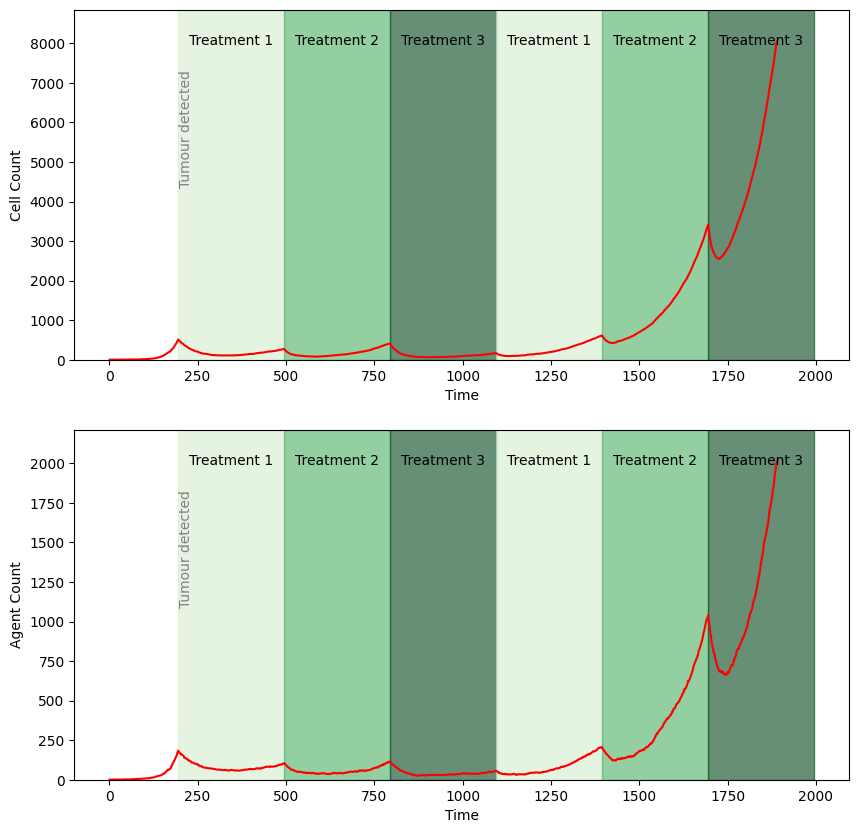

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cell_counts = pd.read_csv("logs/cell_counts.csv")
time_reached_detection = cell_counts[
    cell_counts["cell_count"] >= detection_cell_count
].iloc[0]["timestep"]

max_cell_count = cell_counts["cell_count"].max()
max_agent_count = cell_counts["agent_count"].max()
ylim = {
    "cell_count": (0, max_cell_count + 0.1 * max_cell_count),
    "agent_count": (0, max_agent_count + 0.1 * max_agent_count),
}

# evenly spaced colours from dark green to light green
treatment_colours = plt.cm.Greens(np.linspace(0.2, 1, number_of_treatments))
# plot the cell counts against time
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
for ax, column in zip(axes, ["cell_count", "agent_count"]):
    cell_counts.plot(
        x="timestep", y=column, ax=ax, color="red", legend=False
    )
    # ax.axvline(x=time_reached_detection, color="red", linestyle="--")
    ax.text(
        time_reached_detection + 1,
        ylim[column][1] * 0.5,
        "Tumour detected",
        rotation=90,
        color="grey",
    )

    treatment_cycle_index = 0
    while (
        time_reached_detection + n_timesteps_treatment * treatment_cycle_index
    ) < len(cell_counts):
        treatment_cycle_lower_x = (
            time_reached_detection + n_timesteps_treatment * treatment_cycle_index
        )
        treatment = treatment_cycle_index % number_of_treatments
        treatment_cycle_index += 1
        # ax.axvline(
        #     x=treatment_cycle_lower_x,
        #     color="black",
        #     linestyle="--",
        #     label=f"Switch to treatment {treatment+1}",
        # )
        # ax.text(
        #     treatment_cycle_lower_x + 1,
        #     0,
        #     f"Switch to treatment {treatment+1}",
        #     rotation=90,
        # )
        ax.text(
            treatment_cycle_lower_x + n_timesteps_treatment / 2,
            ylim[column][1] * 0.9,
            f"Treatment {treatment+1}",
            ha="center",
        )
        ax.fill_betweenx(
            ylim[column],
            treatment_cycle_lower_x,
            treatment_cycle_lower_x + n_timesteps_treatment,
            alpha=0.6,
            color=treatment_colours[treatment],
        )
    ax.set_ylim(ylim[column])
    ax.set_xlabel("Time")
    ax.set_ylabel(column.replace("_", " ").title())

In [3]:
import os
os.makedirs("plots", exist_ok=True)
fig.savefig("plots/cell_count.png", dpi=300)

In [4]:
cell_counts

timestep  cell_count  agent_count
0            1           1            1
1            2           1            1
2            3           1            1
3            4           1            1
4            5           1            1
...        ...         ...          ...
1884      1885        7792         1949
1885      1886        7858         1964
1886      1887        7924         1982
1887      1888        7980         1994
1888      1889        8045         2011

[1889 rows x 3 columns]

In [11]:
cell_phenotypes = pd.read_csv("logs/cell_phenotypes.csv")
cell_phenotypes

timestep  agent_id  n_cells   susceptible   resistant_0   resistant_1  \
0              1         0        1  2.486811e-01  2.364320e-01  3.208682e-01   
1              2         0        1  2.489015e-01  2.363774e-01  3.207357e-01   
2              3         0        1  2.491221e-01  2.363227e-01  3.206030e-01   
3              4         0        1  2.493432e-01  2.362679e-01  3.204702e-01   
4              5         0        1  2.495644e-01  2.362130e-01  3.203373e-01   
...          ...       ...      ...           ...           ...           ...   
402116      1889      5271        1  4.926738e-15  8.044553e-04  1.943168e-20   
402117      1889      5272        1  2.552693e-15  1.541198e-08  6.876928e-17   
402118      1889      5273        1  4.376925e-01  5.623075e-01  1.750106e-17   
402119      1889      5274        1  2.480149e-05  1.045650e-06  3.369244e-22   
402120      1889      5275        1  0.000000e+00  3.600000e-44  1.000000e+00   

         resistant_2  
0       1.940187e-01  
1       1.939855e-01  
2       1.939521e-01  
3       1.939188e-01  
4       1.938853e-01  
...              ...  
402116  9.991955e-01  
402117  1.000000e+00  
402118  6.301537e-15  
402119  9.999741e-01  
402120  2.258989e-32  

[402121 rows x 7 columns]

MovieWriter imagemagick unavailable; using Pillow instead.


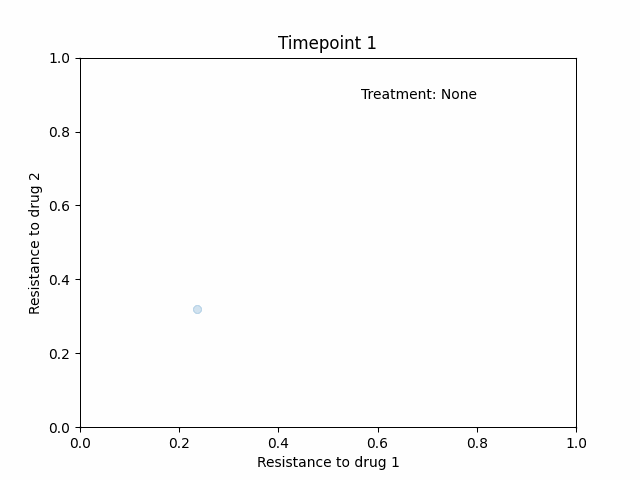

In [25]:
# animated scatter plot of resistant_0 against resistant_1 at each timepoint
import matplotlib.animation as animation
import matplotlib.colors as mcolors

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

treatments_by_timepoint = [
    (
        None
        if timestep < time_reached_detection
        else 1 + ((timestep - time_reached_detection) // n_timesteps_treatment) % 3
    )
    for timestep in cell_phenotypes["timestep"].unique()
]
baseline_alpha = 0.2
max_n_cells = cell_phenotypes["n_cells"].max()
background_treatment_colours = plt.cm.Greens(np.linspace(0.2, 0.5, number_of_treatments))


def update(timepoint: int):
    ax.clear()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"Timepoint {timepoint}")
    ax.scatter(
        cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["resistant_0"],
        cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["resistant_1"],
        alpha=(
            baseline_alpha
            + cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["n_cells"]
            / max_n_cells
            * (1 - baseline_alpha)
        ),
    )
    ax.set_xlabel("Resistance to drug 1")
    ax.set_ylabel("Resistance to drug 2")
    ax.text(
        0.8,
        0.9,
        f"Treatment: {treatments_by_timepoint[timepoint]}",
        ha="right",
        va="center",
    )
    # set background colour to treatment colour
    if treatments_by_timepoint[timepoint] is not None:
        ax.set_facecolor(background_treatment_colours[treatments_by_timepoint[timepoint] - 1])


animate_every_n_timesteps = 3
ani = animation.FuncAnimation(
    fig,
    update,
    frames=range(1, len(treatments_by_timepoint), animate_every_n_timesteps),
)
ani.save("tests/cell_phenotypes.gif", writer="imagemagick", fps=30)
plt.close()
# show the gif
from IPython.display import Image

Image("tests/cell_phenotypes.gif")

new version: proper clinical

* detected when it reaches a certain size; treatment 1 starts 10 timesteps later
* measure cell count periodically; switch treatment cyclically when it first moves upwards (or is within some epsilon, to represent nadir?)
* actually apply treatment-switch 7 timesteps later


Run this beauty overnight...